# EXPLORATION_14

## Ï£ºÏãù ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î≥¥Ïûê

## Samsung

## 1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
* Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

In [31]:
print(type(ts))

<class 'pandas.core.series.Series'>


### ÏïàÏ†ïÏÑ± Ïó¨Î∂Ä ÌôïÏù∏

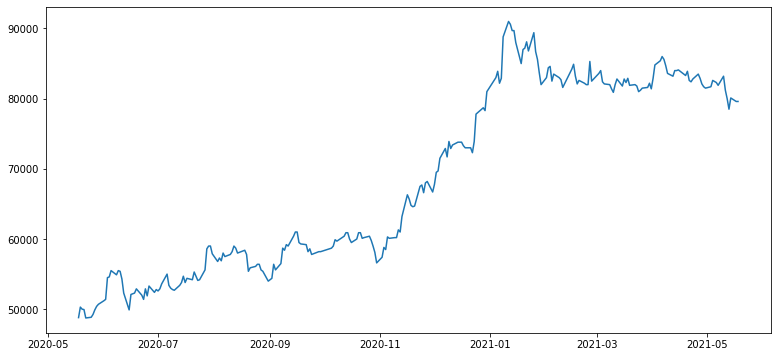

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

Ï†êÏ†ê Ï¶ùÍ∞ÄÌïòÎäî ÌòïÌÉúÏù¥ÎØÄÎ°ú ÌèâÍ∑†Ïù¥ ÏùºÏ†ïÌïòÏßÄ ÏïäÏùÄ nonstationaryÌïú Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.

## 2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [33]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎã§!

In [34]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏùÑ Í≤ΩÏö∞, Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (Î≥¥Í∞ÑÎ≤ï ÏÇ¨Ïö©, Í∏∞Ï§Ä : time)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 


Series([], Name: Close, dtype: float64)

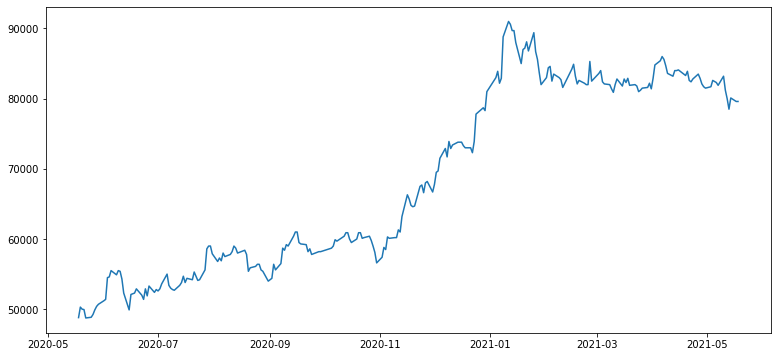

In [35]:
# Îã§Ïãú Í∑∏ÎûòÌîÑÎ•º ÌôïÏù∏
plt.plot(ts)

Í≤∞Ï∏°ÏπòÍ∞Ä ÏõêÎûò ÏóÜÏóàÏúºÎØÄÎ°ú Í∑∏ÎûòÌîÑÎäî Î≥¥Í∞ÑÏ†ÑÌõÑ ÎèôÏùºÌïòÎã§.

### Î°úÍ∑∏ Î≥ÄÌïú

In [36]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

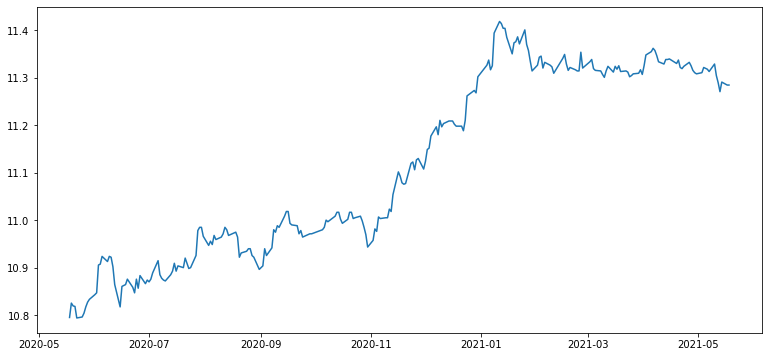

In [37]:
plt.plot(ts_log)

## 3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

In [3]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [4]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

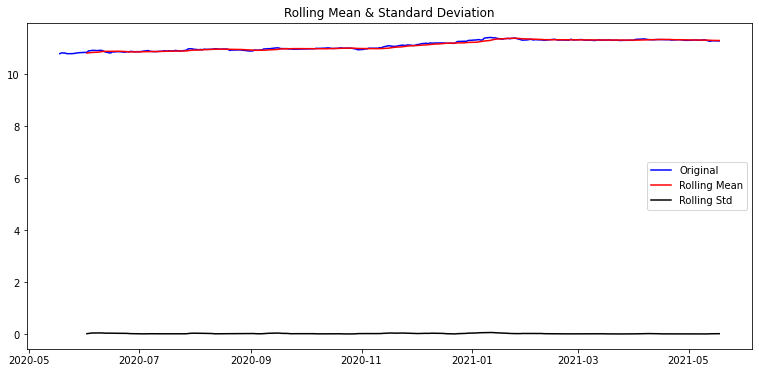

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


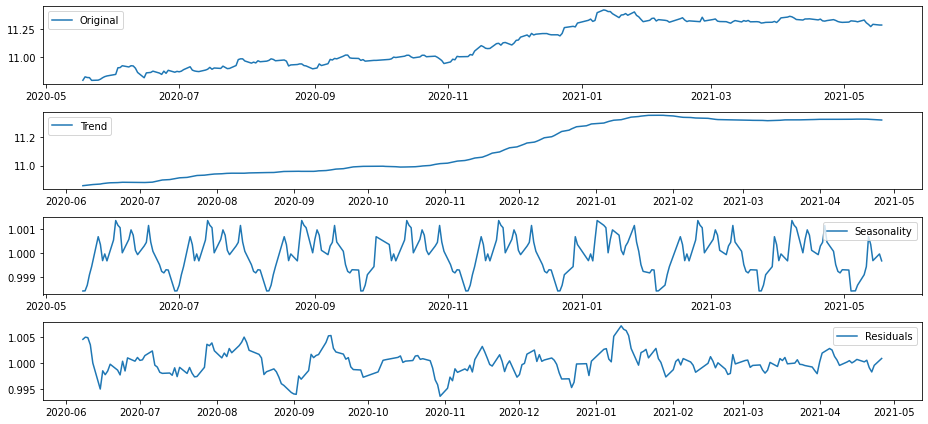

In [40]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [41]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


### Dickey-Fuller TestÎ°ú stationary Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨ÌïúÎã§!
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÏãúÍ≥ÑÏó¥Ïù¥ ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§. <br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏãúÍ≥ÑÏó¥ÏùÄ ÏïàÏ†ïÏ†Å ÏãúÍ≥ÑÏó¥Ïù¥Îã§. <br>
=> p-valueÍ∞Ä 6.234854e-08Ïù¥ÎØÄÎ°ú 0Ïóê Í∞ÄÍπùÍ∏∞ÎïåÎ¨∏Ïóê Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÄ Í∏∞Í∞Å, ÎåÄÎ¶ΩÍ∞ÄÏÑ§Ïù¥ Ï±ÑÌÉùÎêúÎã§.

## 4. ÌïôÏäµ. ÌÖåÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ÌïòÍ∏∞

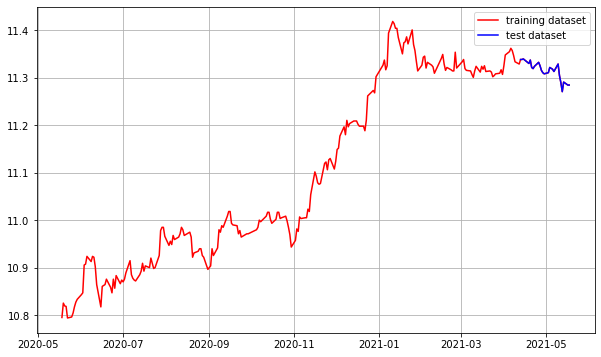

In [42]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [43]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-05-18    10.795486
2020-05-19    10.825760
Name: Close, dtype: float64
(225,)
(25,)


## 5. Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
* ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
* Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

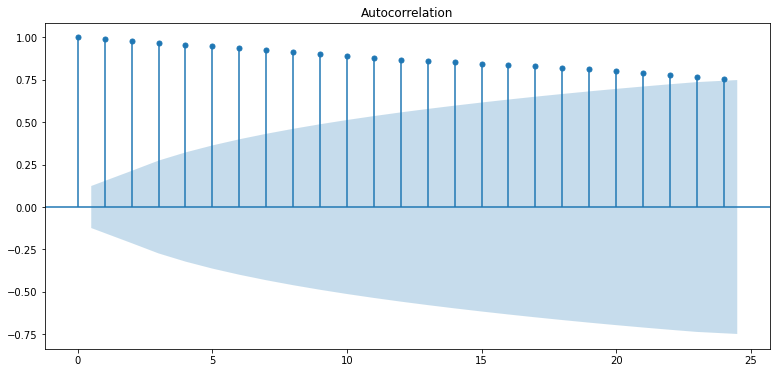

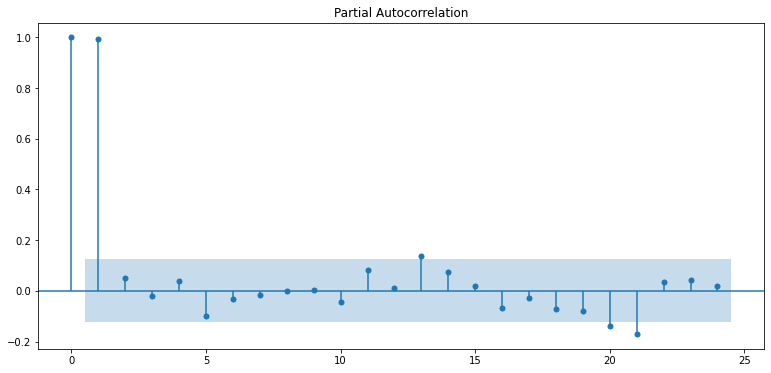

In [44]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

* ACFÎ•º Î≥¥Î©¥ ÏùºÏ†ïÌïòÍ≤å Í∞êÏÜåÌïòÍ≥† ÏûàÍ≥†, PACFÎ•º Î≥¥Î©¥ lag 1 Ïù¥ÌõÑÏóê Í∞ëÏûêÍ∏∞ Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. 
* AR/MA Î™®ÌòïÍ≥º ACF/PACF Í¥ÄÍ≥Ñ ÌëúÎ•º Î≥¥Î©¥ ÏúÑÏôÄ Í∞ôÏùÄ Ìå®ÌÑ¥ÏùÄ AR(1)Ïóê Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º ÎùÑÍ≥† ÏûàÎã§. Îî∞ÎùºÏÑú AR(p),MA(q)Ïù¥ÎØÄÎ°ú p=1, q=0 Î°ú Îëò Ïàò ÏûàÎã§.

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


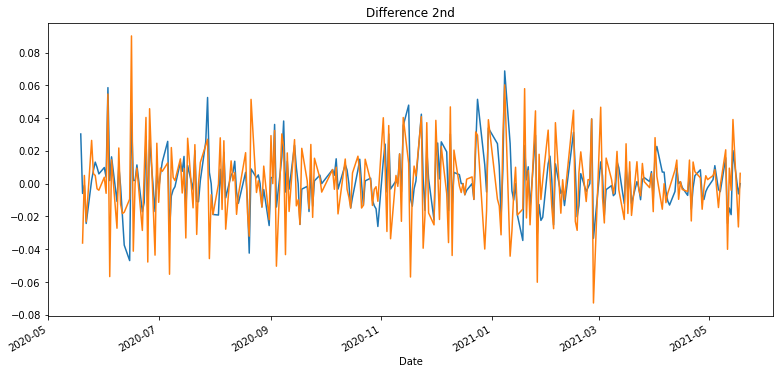

In [45]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

* 1Ï∞® ÎØ∏Î∂ÑÏùÑ ÌñàÏùÑ Îïå p-valueÍ∞Ä 0Ïóê Ï∂©Î∂ÑÌûà Í∞ÄÍπùÍ≥† 2Ï∞®ÎØ∏Î∂Ñ Í≤∞Í≥ºÏôÄ Î≥Ñ Ï∞®Ïù¥Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê d=1Î°ú Îëò Ïàò ÏûàÎã§. 

## 6 . ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏

ÏúÑÏóêÏÑú Íµ¨Ìïú ÌååÎùºÎØ∏ÌÑ∞Ïù∏ p=1, d=1, q=0Î°ú ARIMA(1,1,0) Î™®Îç∏ÏùÑ ÎèåÎ†§Î≥¥Í≤†Îã§.

### ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [46]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 585.396
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sun, 05 Sep 2021   AIC                          -1164.792
Time:                        06:31:02   BIC                          -1154.557
Sample:                             1   HQIC                         -1160.661
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      1.978      0.048    2.17e-05       0.005
ar.L1.D.Close     0.0168      0.067      0.250      0.803      -0.115       0.148
                                    Root

### Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

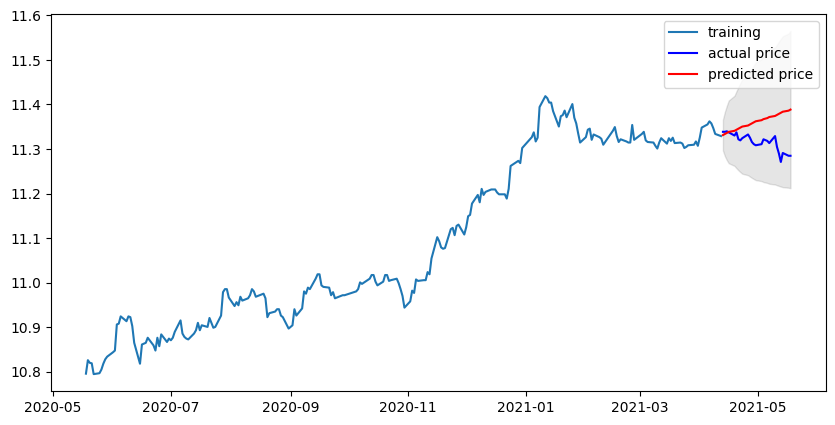

In [47]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

### ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  22087366.126154922
MAE:  3791.3511527213127
RMSE:  4699.719792301976
MAPE: 4.68%


* MAPE Í∏∞Ï§ÄÏúºÎ°ú 4.68%Ïùò ÎÇÆÏùÄ Ïò§Ï∞®Ïú®ÏùÑ Î≥¥Ïù∏Îã§.

## 7. Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥Î≥¥Í∏∞

## 1Ô∏è‚É£ Alphabet Inc. (GOOG)

## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [51]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/new_data/GOOG.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-09-08    1532.390015
2020-09-09    1556.959961
2020-09-10    1532.020020
2020-09-11    1520.719971
2020-09-14    1519.280029
Name: Close, dtype: float64

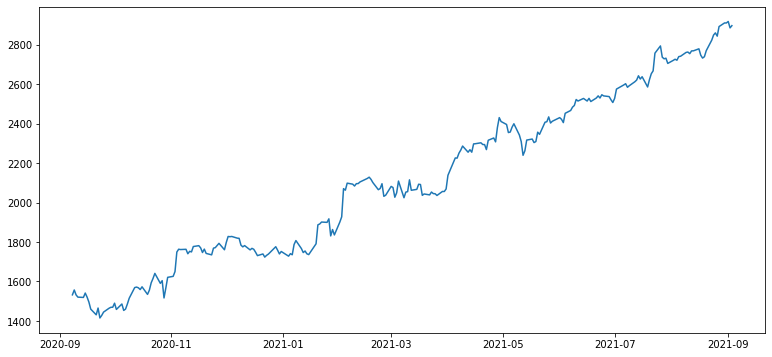

In [52]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

* ÌèâÍ∑†ÏùÄ Ï¶ùÍ∞ÄÌïòÍ≥† Î∂ÑÏÇ∞ÎèÑ ÏùºÏ†ïÌïòÏßÄ ÏïäÏïÑÎ≥¥Ïù∏Îã§ => nonstationary

## Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [53]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎã§!

In [54]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏùÑ Í≤ΩÏö∞, Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (Î≥¥Í∞ÑÎ≤ï ÏÇ¨Ïö©, Í∏∞Ï§Ä : time)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 


Series([], Name: Close, dtype: float64)

### Î°úÍ∑∏ Î≥ÄÌïú

In [55]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

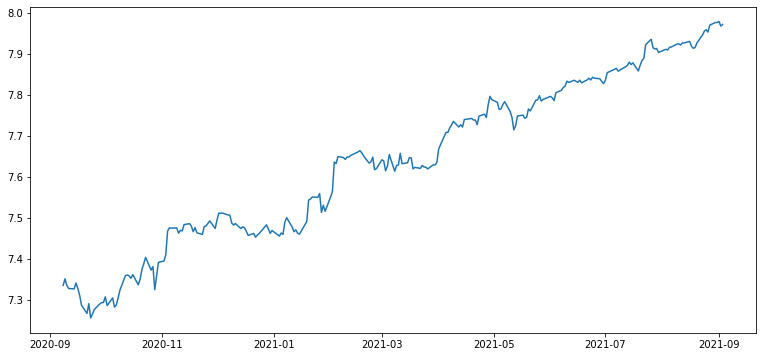

In [56]:
plt.plot(ts_log)

## ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

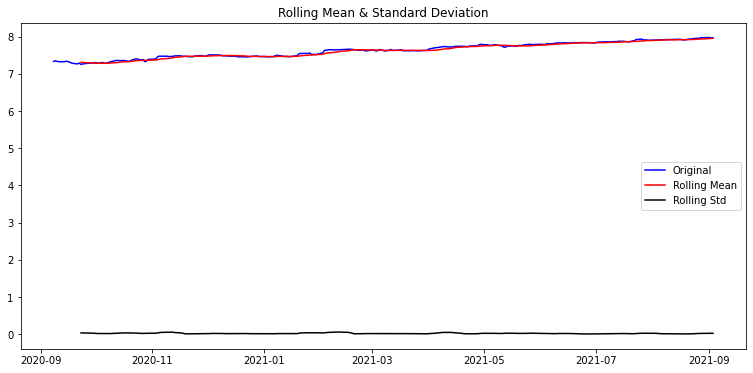

Results of Dickey-Fuller Test:
Test Statistic                  -0.460093
p-value                          0.899572
#Lags Used                       7.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


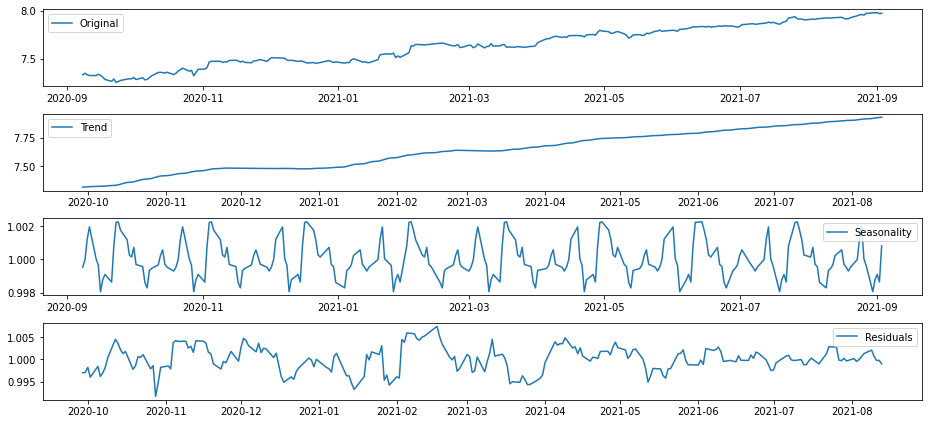

In [57]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [58]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


Results of Dickey-Fuller Test:
Test Statistic                  -2.754986
p-value                          0.064997
#Lags Used                      15.000000
Number of Observations Used    205.000000
Critical Value (1%)             -3.462658
Critical Value (5%)             -2.875744
Critical Value (10%)            -2.574341
dtype: float64


* p-valueÍ∞Ä 0.064997Î°ú ÏóÑÏ≤≠ ÎÇÆÏùÄ Í∞íÏùÄ ÏïÑÎãàÎã§. ÎßåÏïΩ alpha=0.05ÎùºÎ©¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏúºÎØÄÎ°ú ÏãúÍ≥ÑÏó¥Ïù¥ ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.

## ÌïôÏäµ. ÌÖåÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ÌïòÍ∏∞

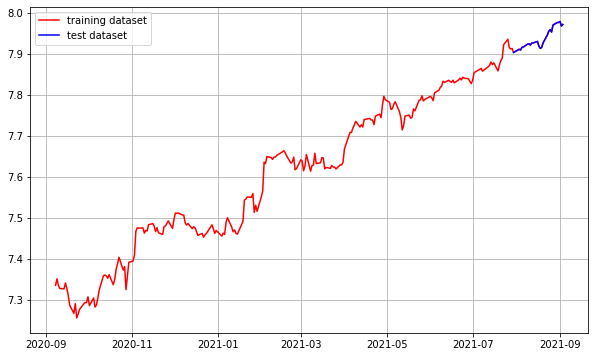

In [59]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [60]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-09-08    7.334584
2020-09-09    7.350490
Name: Close, dtype: float64
(225,)
(26,)


## Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
* ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
* Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

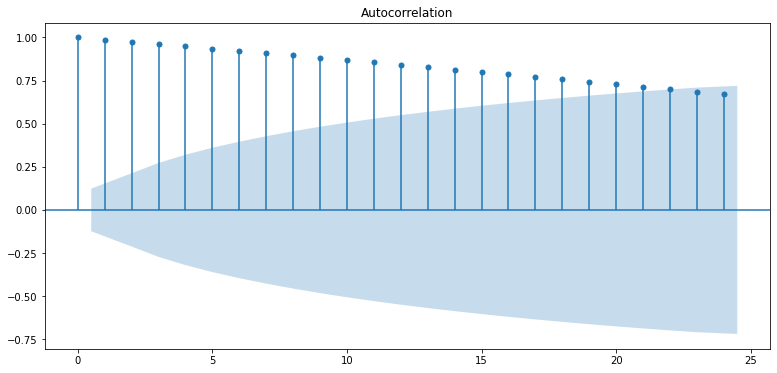

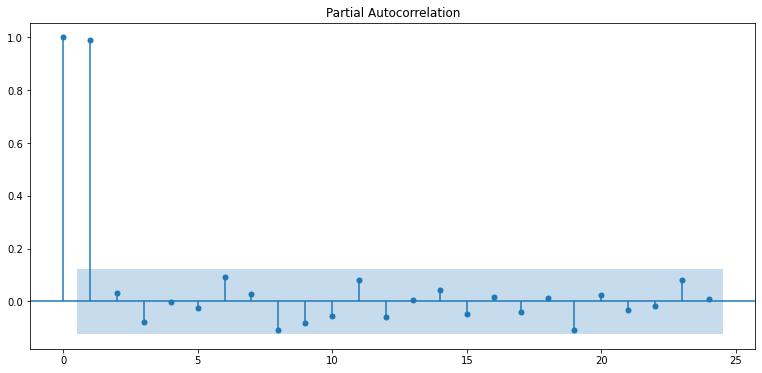

In [61]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

* ACFÎ•º Î≥¥Î©¥ ÏùºÏ†ïÌïòÍ≤å Í∞êÏÜåÌïòÍ≥† ÏûàÍ≥†, PACFÎ•º Î≥¥Î©¥ lag 1 Ïù¥ÌõÑÏóê Í∞ëÏûêÍ∏∞ Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. 
* AR/MA Î™®ÌòïÍ≥º ACF/PACF Í¥ÄÍ≥Ñ ÌëúÎ•º Î≥¥Î©¥ ÏúÑÏôÄ Í∞ôÏùÄ Ìå®ÌÑ¥ÏùÄ AR(1)Ïóê Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º ÎùÑÍ≥† ÏûàÎã§. Îî∞ÎùºÏÑú AR(p),MA(q)Ïù¥ÎØÄÎ°ú p=1, q=0 Î°ú Îëò Ïàò ÏûàÎã§.

Results of Dickey-Fuller Test:
Test Statistic                -6.586295e+00
p-value                        7.300537e-09
#Lags Used                     6.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.930959e+00
p-value                        1.084448e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


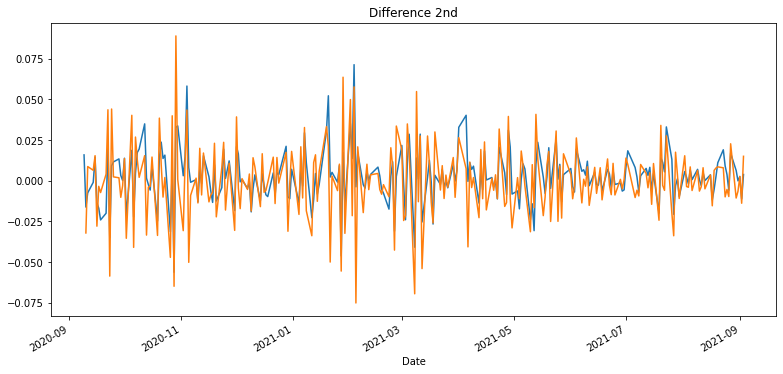

In [62]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

* d=1Ïùº Îïå p-valueÎäî 7.300537e-09 Î°ú 0Ïóê Í∞ÄÍπåÏö¥ Í∞íÏùÑ Í∞ÄÏßÑÎã§. Îî∞ÎùºÏÑú d=1Î°ú ÏÑ§Ï†ïÌï† Ïàò ÏûàÎã§.

## ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏

### ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

In [62]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 603.369
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sun, 05 Sep 2021   AIC                          -1200.738
Time:                        06:34:33   BIC                          -1190.503
Sample:                             1   HQIC                         -1196.606
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0026      0.001      2.464      0.014       0.001       0.005
ar.L1.D.Close    -0.0455      0.067     -0.683      0.495      -0.176       0.085
                                    Root

### Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

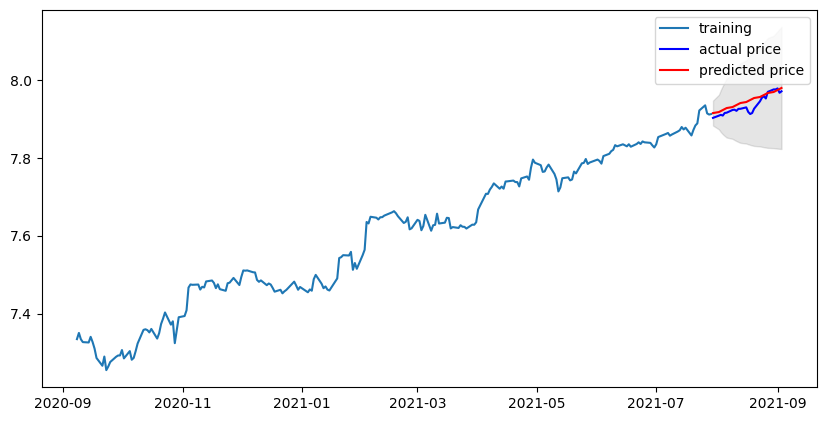

In [63]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

### ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1904.1269051311667
MAE:  35.83070718588424
RMSE:  43.63630260610042
MAPE: 1.29%


ÏúÑÏùò Í∑∏ÎûòÌîÑÎßå Î¥êÎèÑ ÏòàÏ∏°ÏùÑ Ïûò Ìïú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. MAPEÍ∏∞Ï§ÄÏúºÎ°ú 1.29%Ïùò ÏóÑÏ≤≠ ÎÇÆÏùÄ Ïò§Ï∞®Ïú®ÏùÑ Î≥¥Ïù∏Îã§.

## 2Ô∏è‚É£  Doosan Heavy Industries & Construction Co., Ltd. (034020.KS) (ÎëêÏÇ∞Ï§ëÍ≥µÏóÖ)

## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [5]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/new_data/034020.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-09-07    15088.893555
2020-09-08    14292.274414
2020-09-09    13214.497070
2020-09-10    13776.815430
2020-09-11    13917.395508
Name: Close, dtype: float64

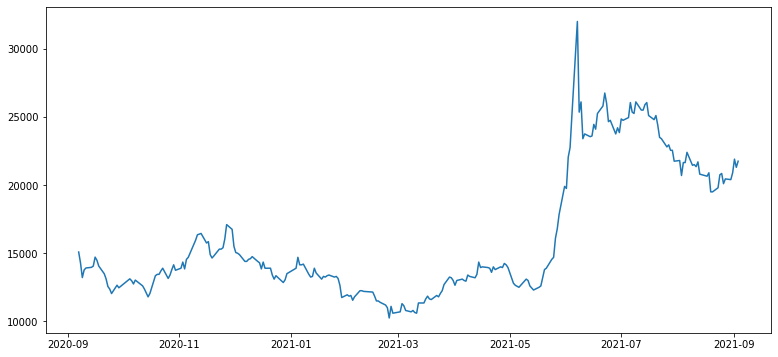

In [6]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

## Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [7]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎã§!

In [8]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏùÑ Í≤ΩÏö∞, Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (Î≥¥Í∞ÑÎ≤ï ÏÇ¨Ïö©, Í∏∞Ï§Ä : time)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 


Series([], Name: Close, dtype: float64)

### Î°úÍ∑∏ Î≥ÄÌïú

In [9]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

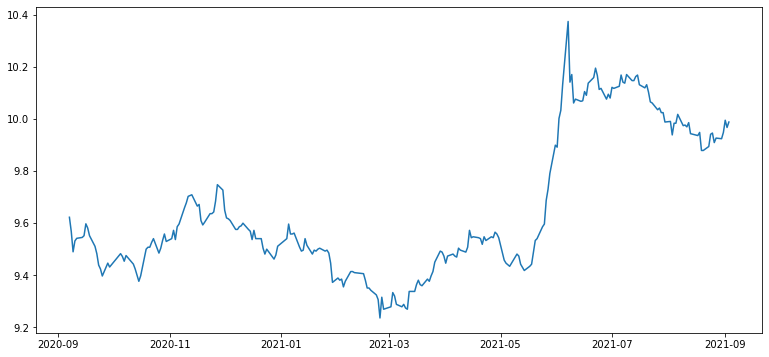

In [10]:
plt.plot(ts_log)

ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÏßÄÏïäÎã§ => nonstationary

## ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

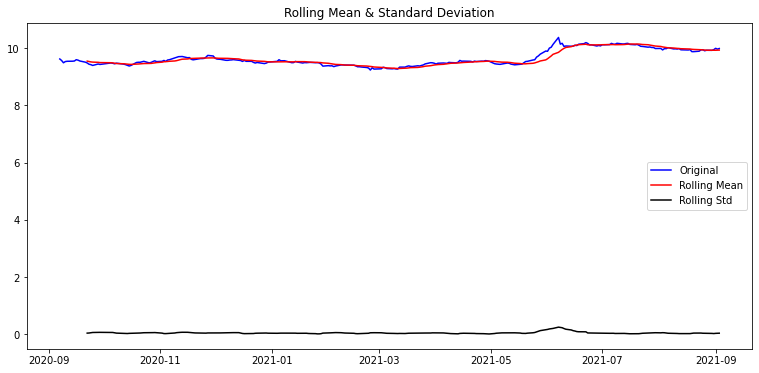

Results of Dickey-Fuller Test:
Test Statistic                  -1.034690
p-value                          0.740403
#Lags Used                       2.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


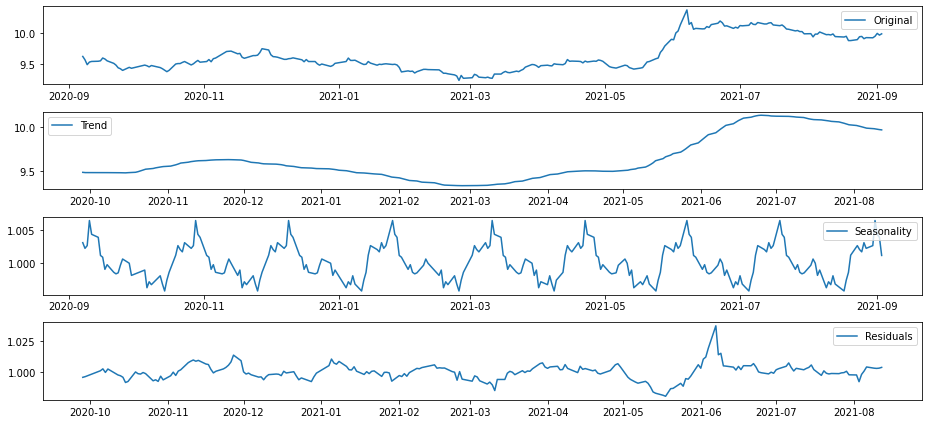

In [11]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [12]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


Results of Dickey-Fuller Test:
Test Statistic                  -4.227257
p-value                          0.000592
#Lags Used                       8.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64


p-valueÍ∞Ä 0Ïóê Í∞ÄÍπåÏö∞ÎØÄÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§.

## ÌïôÏäµ. ÌÖåÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ÌïòÍ∏∞

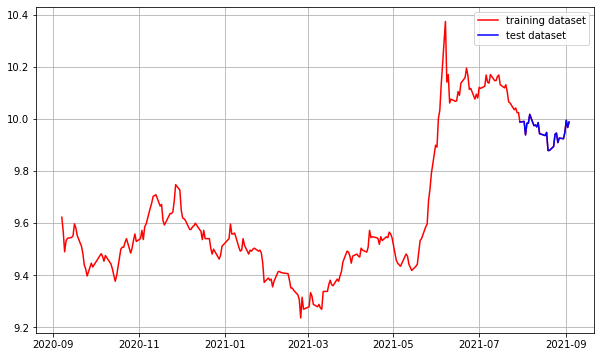

In [13]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [14]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-09-07    9.621714
2020-09-08    9.567474
Name: Close, dtype: float64
(222,)
(25,)


## Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
* ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
* Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

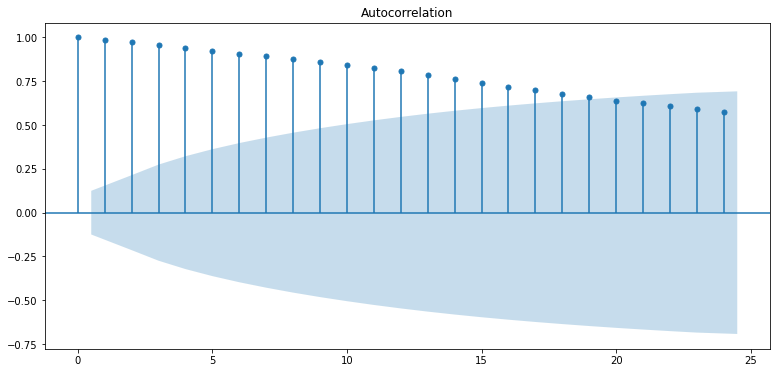

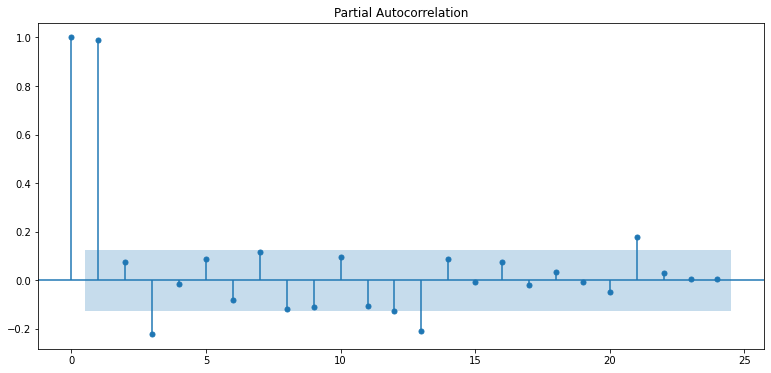

In [15]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

* ACFÎ•º Î≥¥Î©¥ ÏùºÏ†ïÌïòÍ≤å Í∞êÏÜåÌïòÍ≥† ÏûàÍ≥†, PACFÎ•º Î≥¥Î©¥ lag 1 Ïù¥ÌõÑÏóê Í∞ëÏûêÍ∏∞ Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. 
* AR/MA Î™®ÌòïÍ≥º ACF/PACF Í¥ÄÍ≥Ñ ÌëúÎ•º Î≥¥Î©¥ ÏúÑÏôÄ Í∞ôÏùÄ Ìå®ÌÑ¥ÏùÄ AR(1)Ïóê Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º ÎùÑÍ≥† ÏûàÎã§. Îî∞ÎùºÏÑú AR(p),MA(q)Ïù¥ÎØÄÎ°ú p=1, q=0 Î°ú Îëò Ïàò ÏûàÎã§.

Results of Dickey-Fuller Test:
Test Statistic                -9.844968e+00
p-value                        4.645742e-17
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.958261e+00
p-value                        8.359018e-15
#Lags Used                     1.000000e+01
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


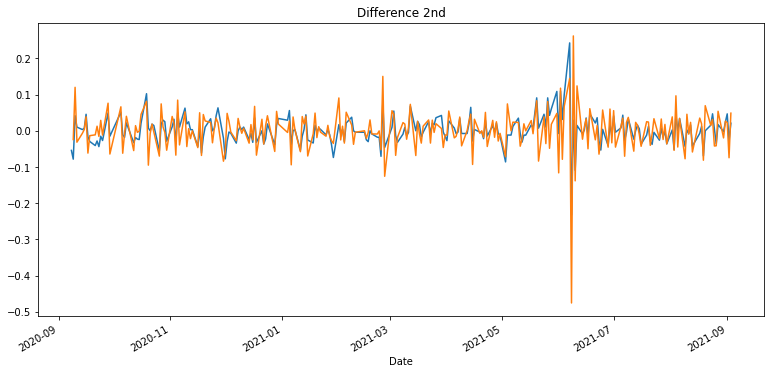

In [16]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

1Ï∞®Ï∞®Î∂ÑÎßå Ìï¥ÎèÑ p-valueÍ∞Ä 0Ïóê Í∞ÄÍπùÍ∏∞ ÎïåÎ¨∏Ïóê d=1Î°ú Îëò Ïàò ÏûàÎã§.

## ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏

### üí°ÏÇ¨Ïã§ Í∑∏ÎûòÌîÑÎ°ú p,d,qÎ•º Ï†ïÌïòÎäî Í≤ÉÏùÄ Ï£ºÍ¥ÄÏ†ÅÏù¥Îùº Ïó¨Îü¨ Í≤ΩÏö∞Ïùò ÏàòÎ°ú Ìï¥Î≥¥Î©¥ÏÑú ÌèâÍ∞ÄÏßÄÌëúÍ∞Ä Í∞ÄÏû• Ï¢ãÏùÄÍ≤ÉÏúºÎ°ú Ï†ïÌïòÎäî Í≤ÉÎèÑ Î∞©Î≤ïÏù¥ÎùºÍ≥† ÌïúÎã§. 
### => Ïó¨Í∏∞ÏÑ† AICÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥¥Í≤†Îã§. (Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÏùÄ Î™®ÌòïÏùÑÏùòÎØ∏)

### ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

### 1. p=1,d=1,q=0Ïù¥ Î™®ÏàòÏù∏ ARIMA Î™®Îç∏ÏùÑ ÎπåÎìú, ÌõàÎ†® => AIC : -780

In [23]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 393.445
Method:                       css-mle   S.D. of innovations              0.041
Date:                Mon, 06 Sep 2021   AIC                           -780.891
Time:                        14:11:26   BIC                           -770.696
Sample:                             1   HQIC                          -776.774
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0018      0.003      0.703      0.482      -0.003       0.007
ar.L1.D.Close    -0.0538      0.067     -0.800      0.424      -0.186       0.078
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### 2. p=1,d=2,q=0Ïù¥ Î™®ÏàòÏù∏ ARIMA Î™®Îç∏ÏùÑ ÎπåÎìú, ÌõàÎ†® => AIC : - 714

In [24]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model2 = ARIMA(train_data, order=(1, 2, 0))  
fitted_m2 = model2.fit(disp=-1)  
print(fitted_m2.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  220
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 360.471
Method:                       css-mle   S.D. of innovations              0.047
Date:                Mon, 06 Sep 2021   AIC                           -714.941
Time:                        14:11:47   BIC                           -704.760
Sample:                             2   HQIC                          -710.830
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.002      0.131      0.896      -0.004       0.004
ar.L1.D2.Close    -0.6086      0.053    -11.451      0.000      -0.713      -0.504
                                    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### 3. p=2,d=1,q=0Ïù¥ Î™®ÏàòÏù∏ ARIMA Î™®Îç∏ÏùÑ ÎπåÎìú, ÌõàÎ†® => AIC : -785

In [25]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model3 = ARIMA(train_data, order=(2, 1, 0))  
fitted_m3 = model3.fit(disp=-1)  
print(fitted_m3.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 396.650
Method:                       css-mle   S.D. of innovations              0.040
Date:                Mon, 06 Sep 2021   AIC                           -785.299
Time:                        14:12:50   BIC                           -771.706
Sample:                             1   HQIC                          -779.811
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.003      0.546      0.585      -0.004       0.008
ar.L1.D.Close    -0.0424      0.066     -0.639      0.523      -0.173       0.088
ar.L2.D.Close     0.1708      0.067     

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


* p=1,d=2,q=0ÏùºÎïåÍ∞Ä AICÍ∞Ä Í∞ÄÏû• Ï¢ãÎã§.

### Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

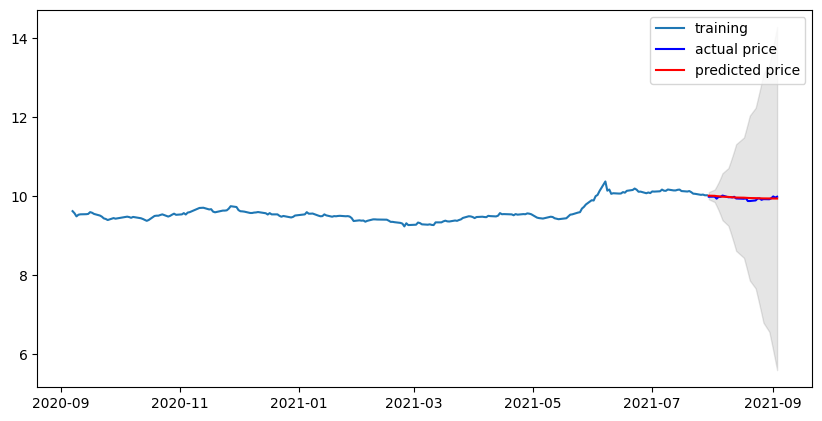

In [26]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m2.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

### ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  538553.9021188361
MAE:  574.4001652223919
RMSE:  733.8623182306311
MAPE: 2.78%


* MAPE Í∏∞Ï§ÄÏúºÎ°ú 2.78%Ïù¥ÎØÄÎ°ú ÎÇÆÏùÄ Ïò§Ï∞®Ïú®ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.

## 3Ô∏è‚É£ LG Display Co., Ltd. (LPL)

## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [63]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/new_data/LPL.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-09-08    6.65
2020-09-09    6.81
2020-09-10    6.83
2020-09-11    7.09
2020-09-14    7.08
Name: Close, dtype: float64

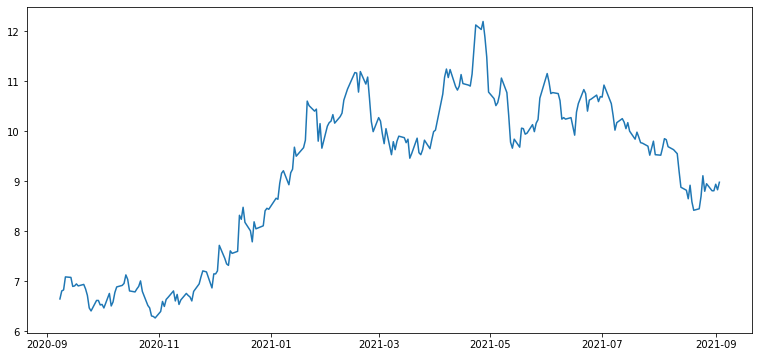

In [64]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 13, 6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

# ÏãúÍ≥ÑÏó¥(time series) Îç∞Ïù¥ÌÑ∞Î•º Ï∞®Ìä∏Î°ú Í∑∏Î†§ Î¥ÖÏãúÎã§. ÌäπÎ≥ÑÌûà Îçî Í∞ÄÍ≥µÌïòÏßÄ ÏïäÏïÑÎèÑ Ïûò Í∑∏Î†§ÏßëÎãàÎã§.
plt.plot(ts)

## Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [65]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎã§!

In [66]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏùÑ Í≤ΩÏö∞, Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (Î≥¥Í∞ÑÎ≤ï ÏÇ¨Ïö©, Í∏∞Ï§Ä : time)
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§. 


Series([], Name: Close, dtype: float64)

### Î°úÍ∑∏ Î≥ÄÌïú

In [67]:
# Î°úÍ∑∏ Î≥ÄÌôò ÏãúÎèÑ 
ts_log = np.log(ts)

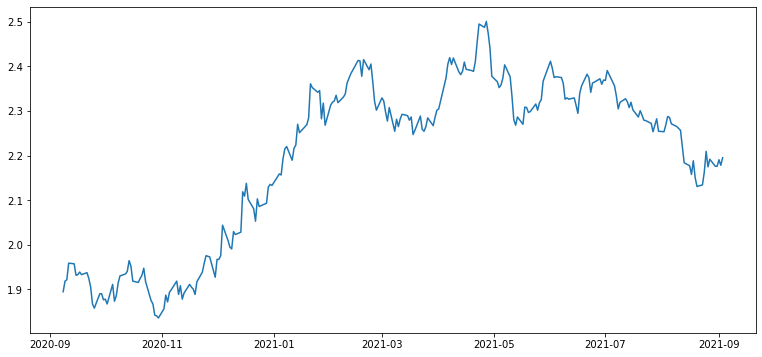

In [68]:
plt.plot(ts_log)

## ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

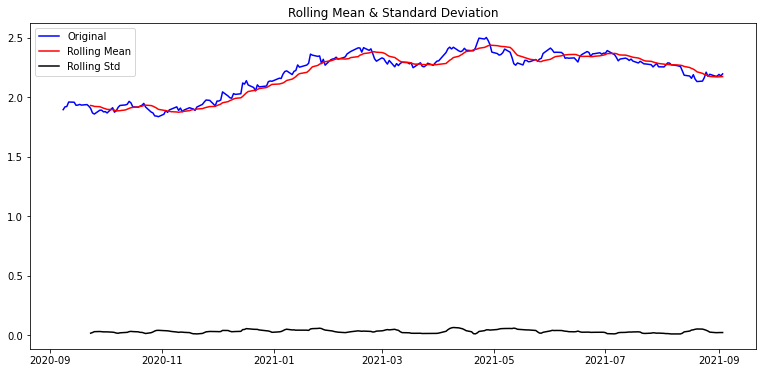

Results of Dickey-Fuller Test:
Test Statistic                  -1.676292
p-value                          0.443367
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


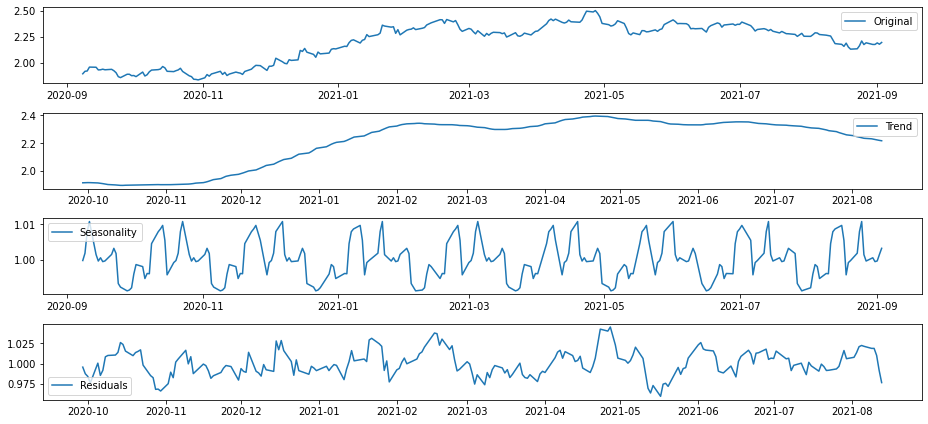

In [69]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [70]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


Results of Dickey-Fuller Test:
Test Statistic                  -4.267631
p-value                          0.000505
#Lags Used                      13.000000
Number of Observations Used    207.000000
Critical Value (1%)             -3.462342
Critical Value (5%)             -2.875606
Critical Value (10%)            -2.574267
dtype: float64


* p-valueÎäî 0Ïóê Í∞ÄÍπåÏö∞ÎØÄÎ°ú ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† ÎßêÌï† Ïàò ÏûàÎã§.

## ÌïôÏäµ. ÌÖåÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ÌïòÍ∏∞

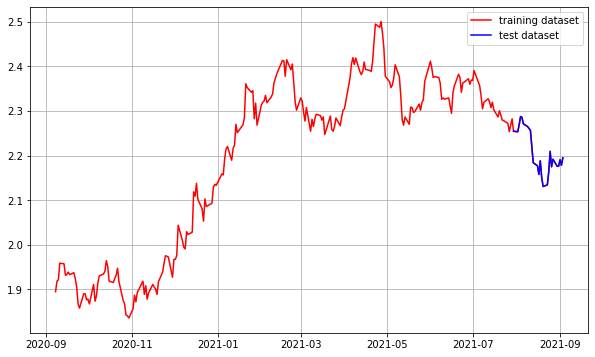

In [71]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [72]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-09-08    1.894617
2020-09-09    1.918392
Name: Close, dtype: float64
(225,)
(26,)


## Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
* ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
* Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

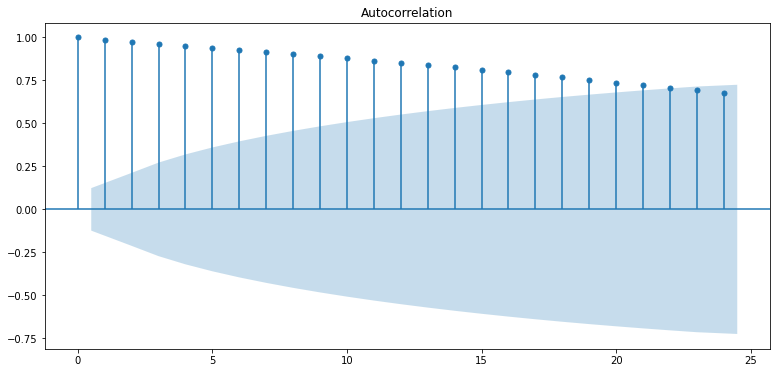

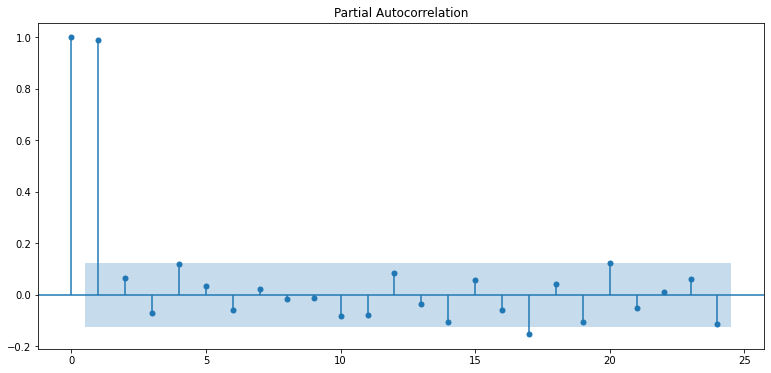

In [73]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

* ACFÎ•º Î≥¥Î©¥ ÏùºÏ†ïÌïòÍ≤å Í∞êÏÜåÌïòÍ≥† ÏûàÍ≥†, PACFÎ•º Î≥¥Î©¥ lag 1 Ïù¥ÌõÑÏóê Í∞ëÏûêÍ∏∞ Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. 
* AR/MA Î™®ÌòïÍ≥º ACF/PACF Í¥ÄÍ≥Ñ ÌëúÎ•º Î≥¥Î©¥ ÏúÑÏôÄ Í∞ôÏùÄ Ìå®ÌÑ¥ÏùÄ AR(1)Ïóê Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º ÎùÑÍ≥† ÏûàÎã§. Îî∞ÎùºÏÑú AR(p),MA(q)Ïù¥ÎØÄÎ°ú p=1, q=0 Î°ú Îëò Ïàò ÏûàÎã§.

Results of Dickey-Fuller Test:
Test Statistic                -1.633250e+01
p-value                        3.051169e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.837717e+00
p-value                        1.824406e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


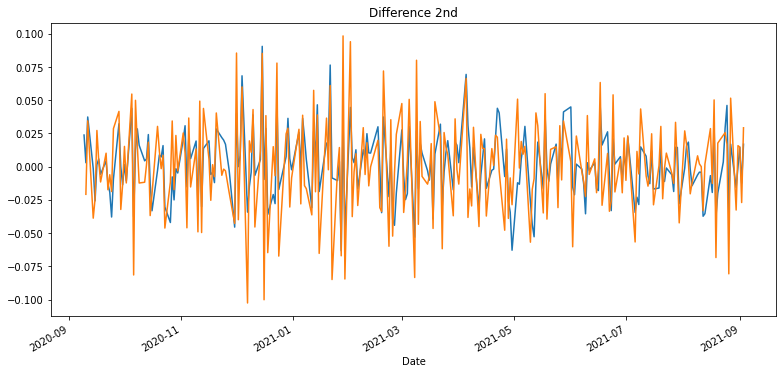

In [74]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

* d=1ÏùºÎïåÎèÑ p-valueÍ∞Ä 0Ïóê Í∞ÄÍπåÏö∞ÎØÄÎ°ú Ïö∞ÏÑ† d=1ÏúºÎ°ú Ìï¥Î≥¥Í≤†Îã§.

## ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏

### ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®

### 1. p=1,d=1,q=0Ïù∏ ARIMA Î™®Îç∏ => AIC : -1011

In [40]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 508.506
Method:                       css-mle   S.D. of innovations              0.025
Date:                Mon, 06 Sep 2021   AIC                          -1011.012
Time:                        14:18:00   BIC                          -1000.777
Sample:                             1   HQIC                         -1006.881
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.002      1.073      0.283      -0.001       0.005
ar.L1.D.Close    -0.0389      0.067     -0.583      0.560      -0.170       0.092
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### 2. p=1,d=2,q=0Ïù∏ ARIMA Î™®Îç∏ => AIC : -925

In [75]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model2 = ARIMA(train_data, order=(1, 2, 0))  
fitted_m2 = model2.fit(disp=-1)  
print(fitted_m2.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  223
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 465.921
Method:                       css-mle   S.D. of innovations              0.030
Date:                Mon, 06 Sep 2021   AIC                           -925.842
Time:                        14:25:26   BIC                           -915.621
Sample:                             2   HQIC                          -921.716
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -8.34e-06      0.001     -0.006      0.995      -0.003       0.003
ar.L1.D2.Close    -0.5573      0.055    -10.074      0.000      -0.666      -0.449
                                    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### 3. p=2,d=1,q=0Ïù∏ ARIMA Î™®Îç∏ => AIC : -1010

In [47]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model3 = ARIMA(train_data, order=(2, 1, 0))  
fitted_m3 = model3.fit(disp=-1)  
print(fitted_m3.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 509.273
Method:                       css-mle   S.D. of innovations              0.025
Date:                Mon, 06 Sep 2021   AIC                          -1010.546
Time:                        14:22:15   BIC                           -996.899
Sample:                             1   HQIC                         -1005.037
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.002      0.999      0.318      -0.002       0.005
ar.L1.D.Close    -0.0356      0.067     -0.534      0.593      -0.166       0.095
ar.L2.D.Close     0.0825      0.066     

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### 4. p=2,d=2,q=0Ïù∏ ARIMA Î™®Îç∏ => AIC : -938

In [48]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model4 = ARIMA(train_data, order=(2, 2, 0))  
fitted_m4 = model4.fit(disp=-1)  
print(fitted_m4.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  223
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 473.109
Method:                       css-mle   S.D. of innovations              0.029
Date:                Mon, 06 Sep 2021   AIC                           -938.219
Time:                        14:23:28   BIC                           -924.590
Sample:                             2   HQIC                          -932.717
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.537e-05      0.001     -0.035      0.972      -0.002       0.002
ar.L1.D2.Close    -0.6971      0.065    -10.772      0.000      -0.824      -0.570
ar.L2.D2.Close    -0.2499      0.065

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


p=1,d=2,q=0 Ïùº ÎïåÏùò AICÍ∞Ä Í∞ÄÏû• Ï¢ãÎã§.

### Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ

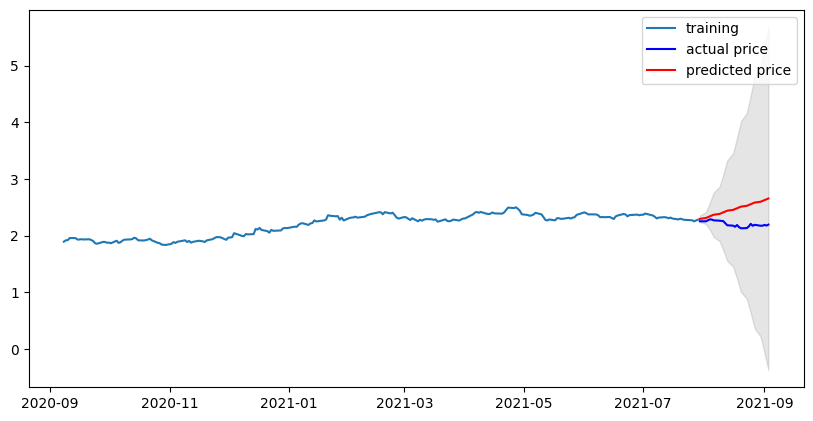

In [82]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m2.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

### ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10.85240459851458
MAE:  2.8648552403153693
RMSE:  3.294298802251335
MAPE: 32.23%


p,d,qÏùò Ïó¨Îü¨ Í≤ΩÏö∞Ïùò ÏàòÎ•º Íµ¨Ìï¥ÏÑú Î™®Îç∏ ÏÑ†Ï†ïÏùÑ ÌïòÎäî Î∞©Î≤ïÏùÑ ÏßÑÌñâÌñàÎäîÎç∞ 32.23%Î°ú ÏÉùÍ∞ÅÎ≥¥Îã§ ÎÜíÏùÄ Ïò§Ï∞®Ïú®Ïù¥ ÎÇòÏôîÎã§.

### Í∑∏Î†áÎã§Î©¥ p=1,d=1,q=0Ïù∏ ARIMA Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥?

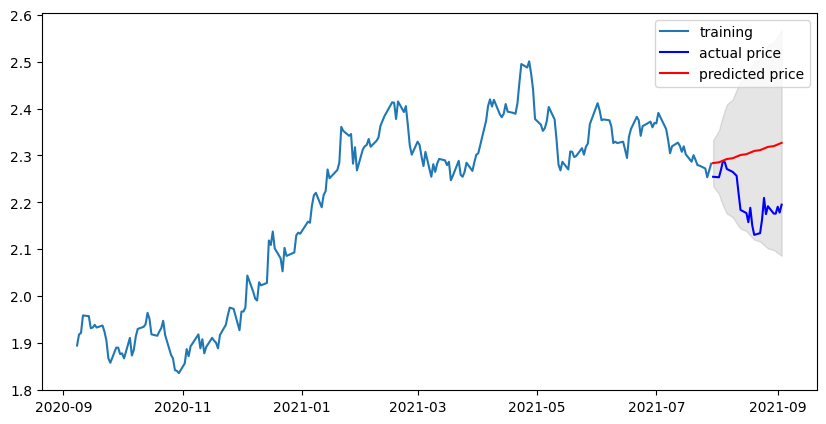

In [84]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÌïòÌïú Î∞îÏö¥Îìú
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # ÏòàÏ∏°Í≤∞Í≥ºÏùò ÏÉÅÌïú Î∞îÏö¥Îìú

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1.1398124162004888
MAE:  0.9223937496041509
RMSE:  1.0676199774266537
MAPE: 10.43%


* 10.43%Î°ú ÎÇÆÏùÄ Ïò§Ï∞®Ïú®Ïù¥ ÎÇòÏôîÎã§. => 1Ï∞®Ï∞®Î∂Ñ ÌñàÏùÑ ÎïåÏùò p-valueÍ∞Ä 2Ï∞®Ï∞®Î∂ÑÌñàÏùÑ ÎïåÏùò p-valueÎ≥¥Îã§ ÎßéÏù¥ ÏûëÏïÑÏÑú Í∑∏Îü∞Í≤ÉÏùºÍπå?

***

# ÌöåÍ≥†

Youtube ÍπÄÏÑ±Î≤îÎãòÏùò [ARIMA Î™®Îç∏ Í∞úÏöî - Part 1,2](https://www.youtube.com/watch?v=ma_L2YRWMHI) ÏòÅÏÉÅÏùÑ Î≥¥Í≥† Í≥µÎ∂ÄÌïòÏòÄÎã§.

## 1. ACF Ìå®ÌÑ¥ÏùÑ ÌÜµÌï¥ Ï†ïÏÉÅÏÑ±ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

![](https://images.velog.io/images/sjina0722/post/d3110fef-3014-4955-9935-f1dd7985a96d/image.png)

Îß® ÏúÑÏùò Í∑∏Î¶ºÏùÑ Î≥¥Î©¥ ÌèâÍ∑†Ïù¥Îûë Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÎã§Îäî Í≤ÉÏùÑ ÏâΩÍ≤å ÎààÏúºÎ°ú ÌåêÎã®Ìï† Ïàò ÏûàÏßÄÎßå Î≥µÏû°Ìïú Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞Ïóî Í∑∏ÎûòÌîÑÎ°ú ÌåêÎã®ÌïòÍ∏∞ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÎã§. <br> => Ïù¥Îïå, ACF plotÏùÑ ÌÜµÌï¥ Ìå®ÌÑ¥ÏùÑ Î≥¥Í≥† Ï†ïÏÉÅÏÑ±ÏùÑ ÌôïÏù∏Ìï¥ Î≥º Ïàò ÏûàÎã§!

#### ÏòàÏ†ú 1)
![](https://images.velog.io/images/sjina0722/post/34da7ac9-8bfc-4e0a-93ea-23766990925f/image.png)

ÏúÑÏùò Îç∞Ïù¥ÌÑ∞Ïùò autocorrelationÏùÑ ÎÇòÌÉÄÎÇ∏ Í≤ÉÏù¥ ÏïÑÎûòÏùò ÏôºÏ™Ω Í∑∏ÎûòÌîÑÏù¥Îã§. NonstationaryÏù∏ Í≤ΩÏö∞Ïóê autocorrelationÏùÑ Ï∞çÏñ¥Î≥¥Î©¥ ÏôºÏ™Ω Í∑∏ÎûòÌîÑÏôÄ Í∞ôÏù¥ Ï≤úÏ≤úÌûà Ï§ÑÏñ¥ÎìúÎäî Î™®ÏäµÏù¥Îã§. 

#### ÏòàÏ†ú 2)
![](https://images.velog.io/images/sjina0722/post/b611f2b2-12c4-44ed-83ce-9e93d266a196/image.png)

ÏúÑÏùò Í∑∏ÎûòÌîÑÎäî Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ Î≥¥Ïù¥Í≥† Î∂ÑÏÇ∞ÎèÑ Î∞îÎÄåÎäî ÎåÄÌëúÏ†ÅÏù∏ nonstationary Ïù¥Îã§. autocorrelationÏùÑ Ï∞çÏñ¥Î≥¥Î©¥ Îñ®Ïñ¥Ï°åÎã§ Ïò¨ÎùºÍ∞îÎã§ÌïòÏßÄÎßå Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îñ®Ïñ¥ÏßÄÎäî Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù∏Îã§. Ïù¥Îü∞ Ìå®ÌÑ¥ Ïó≠Ïãú nonstationaryÏóêÏÑú Î≥º Ïàò ÏûàÎäî Ìå®ÌÑ¥Ïù¥Îã§.

**< ACFÎ•º ÌÜµÌï¥ÏÑú Ï†ïÏÉÅÏÑ±ÏùÑ ÏïåÏïÑÎ≥¥Îäî Î∞©Î≤ï Ï†ïÎ¶¨ >**
* ÏùºÏ†ïÌïú Ìå®ÌÑ¥Ïù¥ ÏóÜÍ±∞ÎÇò Í∞ëÏûêÍ∏∞ Îñ®Ïñ¥ÏßÄÎäî Ìå®ÌÑ¥ => stationary
* ÏùºÏ†ïÌïòÍ≤å Îñ®Ïñ¥ÏßÄÍ±∞ÎÇò Ïò¨ÎùºÍ∞îÎã§ ÎÇ¥Î†§Í∞îÎã§ÌïòÎ©¥ÏÑú ÍµâÏû•Ìûà Ï≤úÏ≤úÌûà Îñ®Ïñ¥ÏßÄÎäî Ìå®ÌÑ¥ => nonstationary

## 2. AR, MA, ARMA Ïù¥ Î™®Îç∏Îì§ÏùÑ Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î∂ÑÏÑùÌï¥ÏïºÎêòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä stationaryÌï¥ÏïºÎêúÎã§. <br> => nonstationaryÎ•º stationaryÎ°ú Î∞îÍøîÏ£ºÎäî Í∞ÑÎã®Ìïú Î∞©Î≤ïÏù¥ Î∞îÎ°ú differencing(Ï∞®Î∂Ñ)!

### Ï∞®Î∂Ñ : ÌòÑ ÏãúÏ†ê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú dÏãúÏ†ê Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞Î•º Î∫Ä Í≤É
![](https://images.velog.io/images/sjina0722/post/dd685970-0654-48a3-aaa2-9c60c68d5d7b/image.png)

![](https://images.velog.io/images/sjina0722/post/367bbe12-7caf-437d-9927-ecfeebd62863/image.png)
* 1Ï∞® Ï∞®Î∂ÑÏù¥ÎûÄ tÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ t-1ÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥
* 2Ï∞® Ï∞®Î∂ÑÏù¥ÎûÄ tÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ t-2ÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥
* dÏ∞® Ï∞®Î∂ÑÏù¥ÎûÄ tÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ t-dÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥

**X(ÏõêÎûò Îç∞Ïù¥ÌÑ∞)Îäî nonstationaryÏó¨ÎèÑ differencingÏùÑ Ìïú Í≤∞Í≥º(Y)Îäî stationaryÎ°ú Î∞îÎÄî ÌôïÎ•†Ïù¥ Îß§Ïö∞ ÌÅ¨Îã§**

## 3. ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä 2Ï∞® Ï∞®Î∂ÑÏúºÎ°ú Ï∂©Î∂ÑÌïòÎã§.

![](https://images.velog.io/images/sjina0722/post/1e6dacb7-3b28-46d1-b79c-3045f7d78396/image.png)
* ÎßåÏïΩ original Îç∞Ïù¥ÌÑ∞Í∞Ä stationaryÏù¥Î©¥ differencingÏùÄ ÌïÑÏöîÏóÜÎã§.
* ÎßåÏïΩ original Îç∞Ïù¥ÌÑ∞Í∞Ä constant average trend(ÏùºÏ†ïÌïòÍ≤å Ï¶ùÍ∞ÄÌïòÍ±∞ÎÇò Í∞êÏÜåÌïòÎäî Ìå®ÌÑ¥)Ïù¥Î©¥ 1Ï∞® Ï∞®Î∂ÑÏù¥Î©¥ Ï∂©Î∂ÑÌïòÎã§.
* ÏïÑÎûòÏ™ΩÏùò Í∑∏ÎûòÌîÑÏôÄ Í∞ôÏù¥ Îçî Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§Î©¥ 2Ï∞® Ï∞®Î∂ÑÍπåÏßÄ Í∞ÄÏïºÎêúÎã§.
* **ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä 2Ï∞® Ï∞®Î∂ÑÏúºÎ°ú Ï∂©Î∂ÑÌïòÎã§.**
* 3Ï∞® Ï∞®Î∂ÑÍπåÏßÄ ÌñàÏùÑ Îïå stationaryÍ∞Ä ÎêòÎäî Îç∞Ïù¥ÌÑ∞Îäî AR,MA,ARMA Î™®Îç∏Î°úÎäî Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ Îê®.

## 4. ACF Ìå®ÌÑ¥

![](https://images.velog.io/images/sjina0722/post/7603265c-100c-4c1f-a7c4-50c3f4cf5428/image.png)
* (a) : lag 2 Ïù¥ÌõÑÏóê Ìôï Í∞êÏÜåÌïúÎã§. (Cut off)
* (b) : ÏßÄÏàòÏ†ÅÏúºÎ°ú Ï≤úÏ≤úÌûà Í∞êÏÜå (Die out/Die down)
* (c) : sineÌï®Ïàò Î™®ÏñëÏúºÎ°ú Í∞êÏÜå (Die out/Die down)
* (d) : 0ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú + - ÏôîÎã§Í∞îÎã§ ÌïòÎ©¥ÏÑú Ï†êÏ∞®Ï†ÅÏúºÎ°ú Ï§ÑÏñ¥ÎìúÎäî Í≤ΩÏö∞ (Die out with osciliation)

## 5. Box-Jenkins ARIMA Procedure
![](https://images.velog.io/images/sjina0722/post/c3efe79c-417b-4ff6-a693-f4ad2ac7dd7a/image.png)

* ARIMA Î™®Îç∏ Íµ¨ÌòÑÌïòÎäî ÏàúÏÑúÏù¥Îã§.<br>

1) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ (Îç∞Ïù¥ÌÑ∞Í∞Ä nonstationaryÏùº Îïå, transformationÏù¥ÎÇò differencingÏùÑ Ïù¥Ïö©Ìï¥ÏÑú stationaryÌïòÍ≤å ÎßåÎì¶) <br>

2) ÏãúÎ≤îÏ†ÅÏúºÎ°ú Ìï¥Î≥º Î™®Îç∏ÏùÑ ÏÑ†Ï†ï<br>
![](https://images.velog.io/images/sjina0722/post/e8fc0b78-cc11-4dab-b6c8-fa60021e4552/image.png)<br>
* MA, AR ,ARMA Î™®Îç∏ Ï§ë Î≠òÎ°ú Ìï†ÏßÄ Ï†ïÌï¥Ïïº ÎêúÎã§.
	- MAÎ™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ΩÏö∞ : ACFÎäî lag q Ïù¥ÌõÑÏóê Ï†àÎã®ÎêòÎäî Ìå®ÌÑ¥ÏùÑ Î≥¥ÏûÑ/PACFÎäî Ï≤úÏ≤úÌûà Í∞êÏÜå ÌïòÎäî Ìå®ÌÑ¥ÏùÑ Î≥¥Ïùº Îïå
	- ARÎ™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ΩÏö∞ :PACFÏù¥ lag p Ïù¥ÌõÑÏóê Ìôï Îñ®Ïñ¥ÏßÄÍ≥† ACFÍ∞Ä ÏßÄÏàòÏ†ÅÏúºÎ°ú Í∞êÏÜå or sineÌï®Ïàò ÌòïÌÉúÎ°ú ÏÜåÎ©∏Ìï† Îïå
	- ARMAÎ™®Îç∏ÏùÄ ÏÑ†ÌÉùÌïòÎäî Í≤ΩÏö∞ : ACFÏôÄ PACFÍ∞Ä (q-p)ÏãúÏ†ê Ïù¥ÌõÑÎ∂ÄÌÑ∞ Îñ®Ïñ¥Ïßà Îïå<br>
    
3) ÌååÎùºÎØ∏ÌÑ∞ Ï∂îÏ†ï<br>
* p,d,qÎ•º Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† Í≤∞Ï†ïÌï†ÏàòÎèÑ ÏûàÏßÄÎßå Ïù¥ Î∞©Î≤ïÏùÑ Ïç®ÏÑú Ìå®ÌÑ¥Ïù¥ Î≥¥Ïù¥ÏßÄ ÏïäÎäî Í≤ΩÏö∞ÎèÑ ÏûàÎã§. <br>
=> Ïù¥Îü¥Îïê Ïó¨Îü¨ Í≤ΩÏö∞Ïùò ÏàòÎ°ú ÎèåÎ†§Î≥¥Í≥† ÌèâÍ∞ÄÏßÄÌëúÍ∞Ä Ï¢ãÏùÄ Í≤ÉÏúºÎ°ú ÏÑ†ÌÉùÌïúÎã§. (ÏòàÎ•º Îì§Ïñ¥ AICÍ∞Ä Ï†úÏùº Ï¢ãÏùÄÍ≤É)<br>

4) Î™®Îç∏Ïù¥ Í¥úÏ∞ÆÏùÄÏßÄ Ï≤¥ÌÅ¨ => Í¥úÏ∞ÆÏßÄ ÏïäÎã§Î©¥ 2Î≤à Ïä§ÌÖùÏúºÎ°ú<br>

5) ÏòàÏ∏°ÌïòÍ∏∞

## ÎäêÎÇÄÏ†ê
* ÏãúÍ≥ÑÏó¥ Í∞úÎÖêÏù¥ ÏÉùÏÜåÌï¥ÏÑú Ïù¥Ìï¥ÌïòÎäîÎç∞ Ïò§Îûò Í±∏Î†∏Îã§.
* ÏïÑÏßÅÎèÑ Îã§ Ïù¥Ìï¥Í∞Ä Îêú Í±¥ ÏïÑÎãàÏó¨ÏÑú Îçî Í≥µÎ∂ÄÌï¥ÏïºÍ≤†Îã§..
* ÌÜµÍ≥ÑÍ≥µÎ∂ÄÎ•º Ìï¥ÏïºÎê† Í≤É Í∞ôÎã§...!! 